# Project: TMDb movie data analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> According to kaggle introduction page, the data contains information that are provided from The Movie Database (TMDb). It collects 5000+ movies and their rating and basic move information, including user ratings and revenue data. This dataset provides some metrics that measure how successful these movies are. These metrics include popularity, revenue and vote average.

> Questions To Explore

    >1. Which genres are most popular from year to year? 
    >2. What kinds of properties are associated with movies that have high revenues?
    >3. Whether the popularity of the movie is dependent on the movie's budget?

In [6]:
# iMport statements 

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import datetime as dt
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

Reading the CSV File into a DataFrame df_tmdb and viewing the basic information of the dataset.

In [7]:
df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
df_tmdb.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<B>Drop unnecessary columns</B>

In [9]:
df_tmdb = df_tmdb.drop(['id','imdb_id','homepage','tagline','overview'], axis=1)

<B>Describing the dataset</B>
> As we notice that that 25% and 50% of revenue and budget values is equal to ZERO same applies to the columns budget_adj and revenue_adj

In [10]:
df_tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<B>Counting all the Null values</B>
>** Note that you will not be able to identify from the isNull count as all the revenue and budget have zeros

In [11]:
df_tmdb.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<B>Counting all the values with zeros in the respective columns </B>
> Here we notice that budget column have 5696 Zeros and revenue have 6016 Zeros

In [12]:
df_tmdb.apply(lambda s : s.value_counts().get(0,0), axis=0)

popularity                 0
budget                  5696
revenue                 6016
original_title             4
cast                       6
director                  45
keywords                 134
runtime                   31
genres                   712
production_companies     156
release_date              28
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

>Replace all Zeros with Nan

In [13]:
cols = df_tmdb.columns
df_tmdb[cols] = df_tmdb[cols].replace({'0':np.nan, 0:np.nan})

<B>Check the null count</B>
> Budget column have 5170 not null rows.

> Revenue have 4850 not null rows

In [14]:
df_tmdb.isnull().sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
keywords                1493
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

<B>Drop the rows that have budget or revenue zero as that would not be useful in the Analysis related to revenue and store it in a new dataframe</B>

In [15]:
#df_tmdb_nullbr=df_tmdb.dropna(subset=['budget'])

In [16]:
#df_tmdb_nullbr.info()

<B> Dropping duplicates<B>

In [17]:
df_tmdb.drop_duplicates(inplace=True)

In [18]:
df_tmdb.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

# Obtaining a list of genres
genre_details = list(map(str,(df_tmdb['genres'])))

def split_str(some_list):
    for i in some_list:
        split_genre = list(map(str,i.split('|')))
        for j in split_genre:
            yield split_genre

#Obtain the list of genres
genre_list = list(map(str,(df_tmdb['genres'])))
genre = []
for i in genre_list:
    split_genre = list(map(str, i.split('|')))
    
    for j in split_genre:
            if j not in genre:
                genre.append(j)

film_genres = df_tmdb.genres.str.cat(sep='|')
film_genres = pd.Series(film_genres.split('|'))
genre = []

film_genres

In [29]:
genre_list = list(map(str,(df_tmdb['genres'])))
print (genre_list)
genre = []
split_genre = [list(map(str, i.split('|'))) for i in genre_list]
for j in split_genre:
    if j not in genre:
        genre.append(j)
#genre = [genre.append(i) for i in split_genre if i not in genre]

['Action|Adventure|Science Fiction|Thriller', 'Action|Adventure|Science Fiction|Thriller', 'Adventure|Science Fiction|Thriller', 'Action|Adventure|Science Fiction|Fantasy', 'Action|Crime|Thriller', 'Western|Drama|Adventure|Thriller', 'Science Fiction|Action|Thriller|Adventure', 'Drama|Adventure|Science Fiction', 'Family|Animation|Adventure|Comedy', 'Comedy|Animation|Family', 'Action|Adventure|Crime', 'Science Fiction|Fantasy|Action|Adventure', 'Drama|Science Fiction', 'Action|Comedy|Science Fiction', 'Action|Adventure|Science Fiction', 'Crime|Drama|Mystery|Western', 'Crime|Action|Thriller', 'Science Fiction|Action|Adventure', 'Romance|Fantasy|Family|Drama', 'War|Adventure|Science Fiction', 'Action|Family|Science Fiction|Adventure|Mystery', 'Action|Drama', 'Action|Drama|Thriller', 'Drama|Romance', 'Comedy|Drama', 'Action', 'Comedy', 'Crime|Comedy|Action|Adventure', 'Drama|Thriller|History', 'Action|Science Fiction|Thriller', 'Mystery|Drama', 'Crime|Action|Science Fiction', 'Comedy|Music

for i in film_genres:
    if i not in genre:
        genre.append(i)


In [16]:
# minimum range value
min_year = min(df_tmdb['release_year']).astype(int)
# maximum range value
max_year = max(df_tmdb['release_year']).astype(int)
# print the range
print(min_year, max_year)

1960 2015


In [24]:
# Creating a dataframe with genre as index and years as columns
genre_df = pd.DataFrame(index = genre, columns = range(min_year, max_year + 1))
# to fill not assigned values to zero
genre_df = genre_df.fillna(value = 0)
print (genre_df.head())

                 1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
Action              0     0     0     0     0     0     0     0     0     0   
Adventure           0     0     0     0     0     0     0     0     0     0   
Science Fiction     0     0     0     0     0     0     0     0     0     0   
Thriller            0     0     0     0     0     0     0     0     0     0   
Fantasy             0     0     0     0     0     0     0     0     0     0   

                 ...   2006  2007  2008  2009  2010  2011  2012  2013  2014  \
Action           ...      0     0     0     0     0     0     0     0     0   
Adventure        ...      0     0     0     0     0     0     0     0     0   
Science Fiction  ...      0     0     0     0     0     0     0     0     0   
Thriller         ...      0     0     0     0     0     0     0     0     0   
Fantasy          ...      0     0     0     0     0     0     0     0     0   

                 2015  
Action              0  
Ad

In [36]:
# list of years of each movie
year = np.array(df_tmdb['release_year'])

# index to access year value
z = 0
for i in genre_list:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
        genre_df.loc[j, year[z]] = genre_df.loc[j, year[z]] + 1
    z+=1
genre_df

KeyError: 'the label [nan] is not in the [index]'

Text(0.5,1,'Movies in each genre between 1960 and 2015')

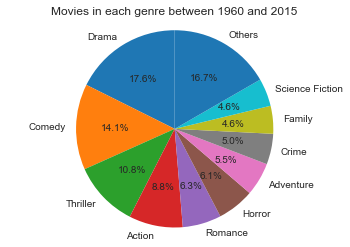

In [28]:
# number of movies in each genre.
genre_count = {}
genre = []
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
        if j in genre:
            genre_count[j] = genre_count[j] + 1
        else:
            genre.append(j)
            genre_count[j] = 1
gen_series = pd.Series(genre_count)

#sort genre and filter top 10

gen_series = gen_series.sort_values(ascending = False)
label = list(map(str,gen_series[0:10].keys()))
label.append('Others')
gen = gen_series[0:10]
sum = 0
for i in gen_series[10:]:
    sum += i
gen['sum'] = sum

# pi chart

fig1, ax1 = plt.subplots()
ax1.pie(gen,labels = label, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.title("Movies in each genre between 1960 and 2015")

TypeError: cannot perform reduce with flexible type

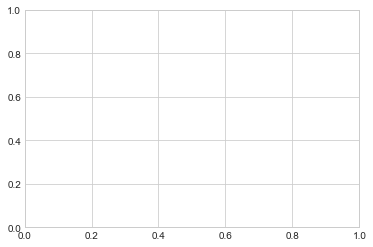

In [30]:
sns.barplot(x= ,y= , data=genre_df)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

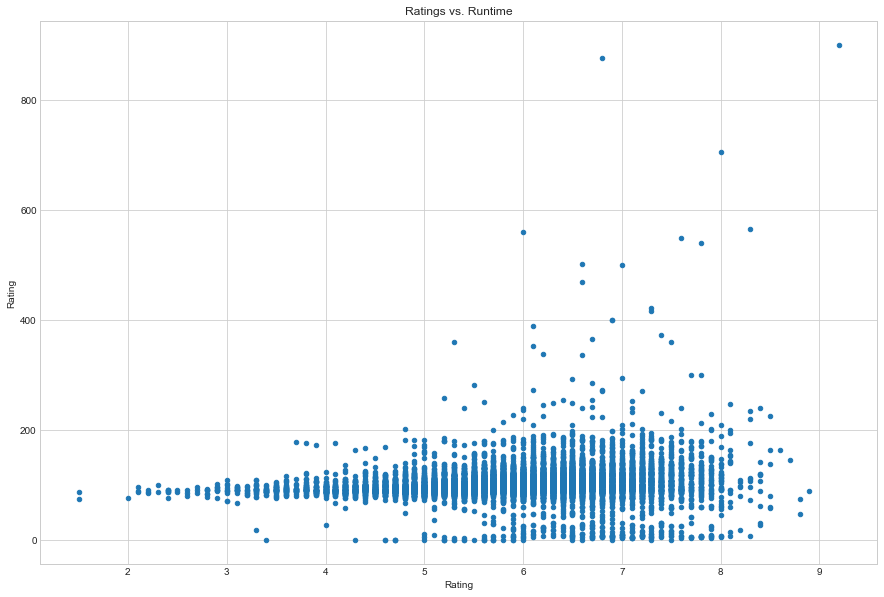

In [4]:
#From this scatter plot, we can draw several conclusions:
# Plot scatter plot of these two columns
df_tmdb.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10))
plt.title('Ratings vs. Runtime')
plt.xlabel('Rating')
plt.ylabel('Rating');

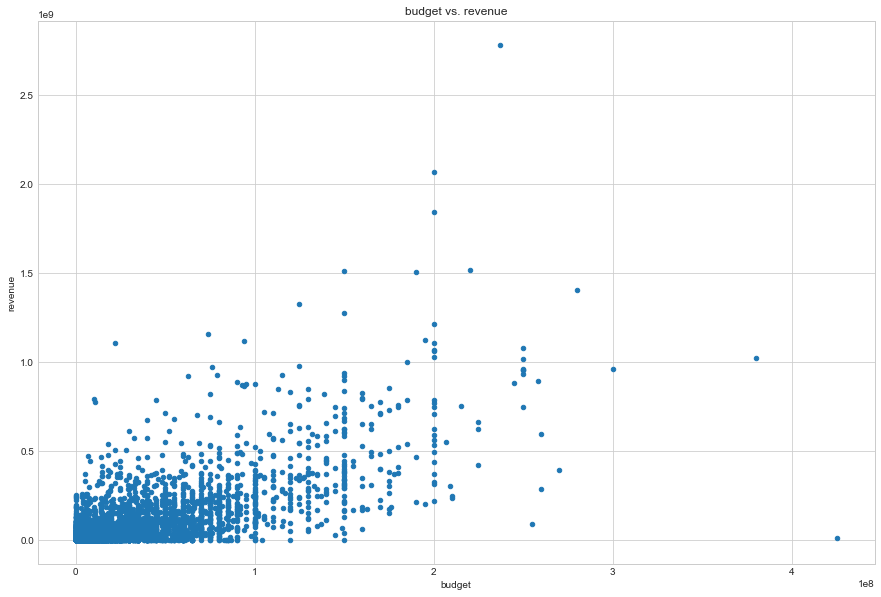

In [6]:
df_tmdb.plot(x='budget', y='revenue', kind='scatter', figsize=(15,10))
plt.title('budget vs. revenue')
plt.xlabel('budget')
plt.ylabel('revenue');

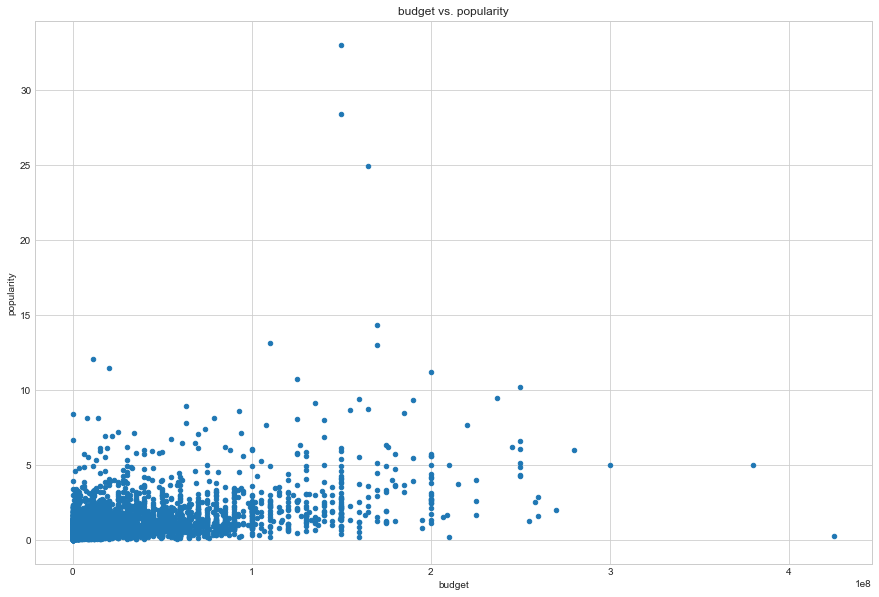

In [7]:
df_tmdb.plot(x='budget', y='popularity', kind='scatter', figsize=(15,10))
plt.title('budget vs. popularity')
plt.xlabel('budget')
plt.ylabel('popularity');

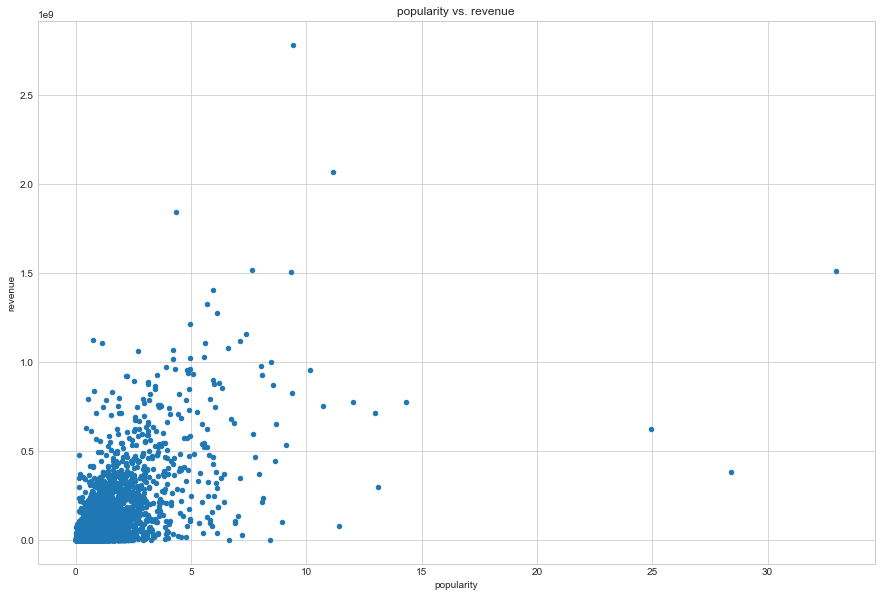

In [8]:
df_tmdb.plot(x='popularity', y='revenue', kind='scatter', figsize=(15,10))
plt.title('popularity vs. revenue')
plt.xlabel('popularity')
plt.ylabel('revenue');

In [5]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1